In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import json
import cv2
from google.colab.patches import cv2_imshow

In [37]:
img = cv2.imread('/content/drive/MyDrive/KoreanBeef/data/00_source/images/cow_1++_101.jpg', cv2.IMREAD_COLOR)
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

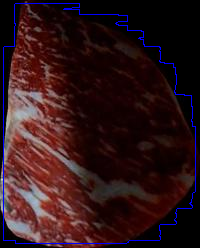

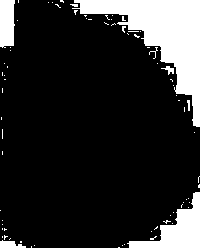

In [48]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_black_t = np.array([0,0,0])
upper_black_t = np.array([20,20,20])
mask1 = cv2.inRange(hsv, lower_black_t, upper_black_t)
cv2_imshow(img)
cv2_imshow(mask1)

In [49]:
li = []
for line in mask1:
  li = line
  res = [i for i, val in enumerate(li) if val == 0]
  st, end = res[0], res[-1]
  for i in range(len(line)):
    if line[i] == 255:
      line[i] = 1
  for i in range(st, end):
    line[i] = 0
mask1

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

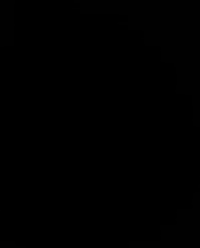

In [50]:
cv2_imshow(mask1)

In [51]:
def format_mask(mask):
  n_mask = []
  for line_idx in range(len(mask)):
    line_list = list(mask[line_idx])
    for ele_idx in range(len(line_list)):
      if line_list[ele_idx] == 1:
        line_list[ele_idx] = 0
      else:
        line_list[ele_idx] = 1

      if line_idx < 4:
        line_list[ele_idx] = 0
      elif line_idx > len(mask) - 5:
        line_list[ele_idx] = 0
      if ele_idx < 4 or ele_idx > len(line_list) -5 :
        line_list[ele_idx] = 0
    n_mask.append(line_list)
  return n_mask

In [52]:
conv_mask = np.array(format_mask(mask1))
conv_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
import skimage.measure as measure

def close_contour(contour):
  if not np.array_equal(contour[0], contour[-1]):
    contour = np.vstack((contour, contour[0]))
  return contour

def binary_mask_to_polygon(binary_mask, tolerance=0):
  polygons = []
  # pad mask to close contours of shapes which start and end at an edge
  padded_binary_mask = np.pad(binary_mask, pad_width=1, mode='constant', constant_values=0)
  contours = measure.find_contours(padded_binary_mask, 0.5)
  contours = np.subtract(contours, 1)
  for contour in contours:
      contour = close_contour(contour)
      contour = measure.approximate_polygon(contour, tolerance)
      if len(contour) < 3: 
          continue
      contour = np.flip(contour, axis=1)
      segmentation = contour.ravel().tolist()
      # after padding and subtracting 1 we may get -0.5 points in our segmentation
      segmentation = [0 if i < 0 else i for i in segmentation]
      polygons.append(segmentation)

  return polygons


In [54]:
poly = binary_mask_to_polygon(conv_mask)
poly

[[126.0,
  243.5,
  125.0,
  243.5,
  124.0,
  243.5,
  123.0,
  243.5,
  122.0,
  243.5,
  121.0,
  243.5,
  120.0,
  243.5,
  119.0,
  243.5,
  118.0,
  243.5,
  117.0,
  243.5,
  116.0,
  243.5,
  115.0,
  243.5,
  114.0,
  243.5,
  113.0,
  243.5,
  112.0,
  243.5,
  111.0,
  243.5,
  110.0,
  243.5,
  109.0,
  243.5,
  108.0,
  243.5,
  107.0,
  243.5,
  106.0,
  243.5,
  105.0,
  243.5,
  104.0,
  243.5,
  103.0,
  243.5,
  102.0,
  243.5,
  101.0,
  243.5,
  100.0,
  243.5,
  99.0,
  243.5,
  98.0,
  243.5,
  97.0,
  243.5,
  96.0,
  243.5,
  95.0,
  243.5,
  94.0,
  243.5,
  93.0,
  243.5,
  92.0,
  243.5,
  91.0,
  243.5,
  90.0,
  243.5,
  89.0,
  243.5,
  88.0,
  243.5,
  87.0,
  243.5,
  86.0,
  243.5,
  85.0,
  243.5,
  84.0,
  243.5,
  83.0,
  243.5,
  82.0,
  243.5,
  81.0,
  243.5,
  80.0,
  243.5,
  79.0,
  243.5,
  78.0,
  243.5,
  77.0,
  243.5,
  76.0,
  243.5,
  75.0,
  243.5,
  74.0,
  243.5,
  73.0,
  243.5,
  72.0,
  243.5,
  71.0,
  243.5,
  70.0,
  243.5,
  69

In [55]:
len(poly)

1

In [56]:
px = [a for a in poly[0][0::2]]
py = [a for a in poly[0][1::2]]
poly2 = [[x, y] for x, y in zip(px, py)]
# pts = [p for x in poly for p in x]
poly2

[[126.0, 243.5],
 [125.0, 243.5],
 [124.0, 243.5],
 [123.0, 243.5],
 [122.0, 243.5],
 [121.0, 243.5],
 [120.0, 243.5],
 [119.0, 243.5],
 [118.0, 243.5],
 [117.0, 243.5],
 [116.0, 243.5],
 [115.0, 243.5],
 [114.0, 243.5],
 [113.0, 243.5],
 [112.0, 243.5],
 [111.0, 243.5],
 [110.0, 243.5],
 [109.0, 243.5],
 [108.0, 243.5],
 [107.0, 243.5],
 [106.0, 243.5],
 [105.0, 243.5],
 [104.0, 243.5],
 [103.0, 243.5],
 [102.0, 243.5],
 [101.0, 243.5],
 [100.0, 243.5],
 [99.0, 243.5],
 [98.0, 243.5],
 [97.0, 243.5],
 [96.0, 243.5],
 [95.0, 243.5],
 [94.0, 243.5],
 [93.0, 243.5],
 [92.0, 243.5],
 [91.0, 243.5],
 [90.0, 243.5],
 [89.0, 243.5],
 [88.0, 243.5],
 [87.0, 243.5],
 [86.0, 243.5],
 [85.0, 243.5],
 [84.0, 243.5],
 [83.0, 243.5],
 [82.0, 243.5],
 [81.0, 243.5],
 [80.0, 243.5],
 [79.0, 243.5],
 [78.0, 243.5],
 [77.0, 243.5],
 [76.0, 243.5],
 [75.0, 243.5],
 [74.0, 243.5],
 [73.0, 243.5],
 [72.0, 243.5],
 [71.0, 243.5],
 [70.0, 243.5],
 [69.0, 243.5],
 [68.0, 243.5],
 [67.0, 243.5],
 [66.0, 243.5

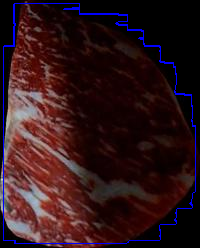

In [57]:
color1 = (255, 0, 0)
image = cv2.polylines(img, np.int32([np.array(poly2)]), True, color1)

cv2_imshow(image)

In [58]:
np.array(poly2).shape

(935, 2)